In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from timeit import default_timer as timer
from functools import partial
from random import choices
import logging

In [3]:
import sdgym
from sdgym import load_dataset
from sdgym import benchmark
from sdgym import load_dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
import pgmpy

from pgmpy.models import BayesianModel
from pgmpy.estimators import TreeSearch, HillClimbSearch, BicScore, ExhaustiveSearch, BayesianEstimator
from pgmpy.sampling import BayesianModelSampling

In [6]:
import xgboost as xgb
from xgboost import XGBClassifier

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.isotonic import IsotonicRegression

In [8]:
from sklearn.metrics import (
    mutual_info_score,
    adjusted_mutual_info_score,
    normalized_mutual_info_score,
)

In [9]:
from scipy import interpolate

In [10]:
from synthsonic.models.kde_utils import kde_smooth_peaks_1dim, kde_smooth_peaks
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
logging.basicConfig(level=logging.INFO)

In [13]:
dataset_name = 'mnist28'

In [14]:
data, categorical_columns, ordinal_columns = load_dataset(dataset_name)

INFO:sdgym.data:Loading dataset mnist28 (all variables)


In [15]:
data.shape

(60000, 785)

In [16]:
categorical_columns, ordinal_columns

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [17]:
for i in range(data.shape[1]):
    print (i, len(np.unique(data[:, i])))

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 2
14 2
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 1
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 2
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 2
61 1
62 2
63 2
64 2
65 2
66 2
67 2
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 2
76 2
77 2
78 2
79 2
80 2
81 2
82 1
83 1
84 1
85 1
86 2
87 1
88 1
89 2
90 2
91 2
92 2
93 2
94 2
95 2
96 2
97 2
98 2
99 2
100 2
101 2
102 2
103 2
104 2
105 2
106 2
107 2
108 2
109 2
110 1
111 1
112 1
113 1
114 2
115 1
116 2
117 2
118 2
119 2
120 2
121 2
122 2
123 2
124 2
125 2
126 2
127 2
128 2
129 2
130 2
131 2
132 2
133 2
134 2
135 2
136 2
137 2
138 2
139 1
140 1
141 1
142 1
143 2
144 2
145 2
146 2
147 2
148 2
149 2
150 2
151 2
152 2
153 2
154 2
155 2
156 2
157 2
158 2
159 2
160 2
161 2
162 2
163 2
164 2
165 2
166 2
167 1
168 1
169 1
170 2
171 2
172 2
173 2
174 2
175 2
176 2
177 2
178 2
179 2
180 2
181 2
182 2
183 2
184 2


In [18]:
twos = [i for i in range(data.shape[1]) if len(np.unique(data[:, i])) > 1]

(array([5923.,    0.,    0.,    0., 6742.,    0.,    0.,    0., 5958.,
           0.,    0.,    0.,    0., 6131.,    0.,    0.,    0., 5842.,
           0.,    0.,    0.,    0., 5421.,    0.,    0.,    0., 5918.,
           0.,    0.,    0.,    0., 6265.,    0.,    0.,    0., 5851.,
           0.,    0.,    0., 5949.]),
 array([0.   , 0.225, 0.45 , 0.675, 0.9  , 1.125, 1.35 , 1.575, 1.8  ,
        2.025, 2.25 , 2.475, 2.7  , 2.925, 3.15 , 3.375, 3.6  , 3.825,
        4.05 , 4.275, 4.5  , 4.725, 4.95 , 5.175, 5.4  , 5.625, 5.85 ,
        6.075, 6.3  , 6.525, 6.75 , 6.975, 7.2  , 7.425, 7.65 , 7.875,
        8.1  , 8.325, 8.55 , 8.775, 9.   ]),
 <a list of 40 Patch objects>)

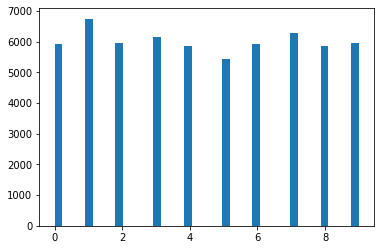

In [21]:
plt.hist(data[:, 784], bins=40)

In [32]:
def zero_weight(x, y):
    return 0.

In [24]:
kde = KDECopulaNNPdf(
    use_KDE=False, 
    # categorical_columns=categorical_columns+ordinal_columns,
    distinct_threshold=100,
    n_uniform_bins=30,
    n_calibration_bins=100,
    test_size=0.2,
    estimator_type='tan', # 'chow-liu', # 'tan'
    #edge_weights_fn=zero_weight,
    class_node=784,
#        clf=clf,
#         ordering='mi',
)
kde = kde.fit(data)
    


INFO:KDECopulaNNPdf:Processing 0 numerical and 785 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
Building tree: 100%|██████████| 306936/306936.0 [14:06<00:00, 362.44it/s]
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 298000 data points.
Generating for node: 166: 100%|██████████| 785/785 [14:36<00:00,  1.12s/it]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 785 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
/Users/maxbaak/Projects/synthsonic/synthsonic/models/kde_copula_nn_pdf.py:481: RuntimeWarning: divide by zero encountered in true_divide
  self.max_weight_ = max_p1f / (1. - max_p1f)
INFO:KDECopulaNNPdf:Maximum weight found: inf


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

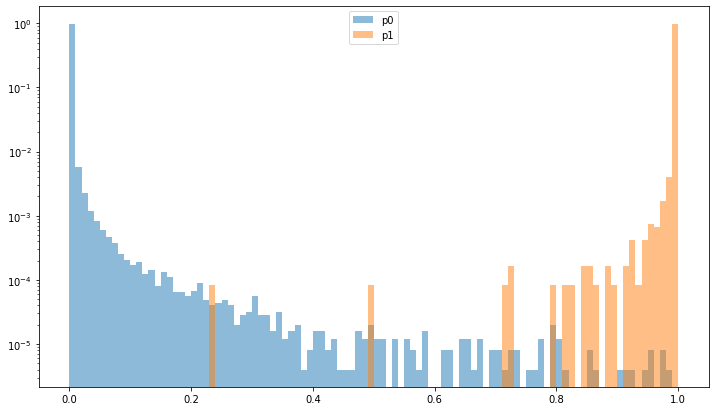

/Users/maxbaak/Projects/synthsonic/synthsonic/models/kde_copula_nn_pdf.py:481: RuntimeWarning: divide by zero encountered in true_divide
  self.max_weight_ = max_p1f / (1. - max_p1f)
INFO:KDECopulaNNPdf:Maximum weight found: inf


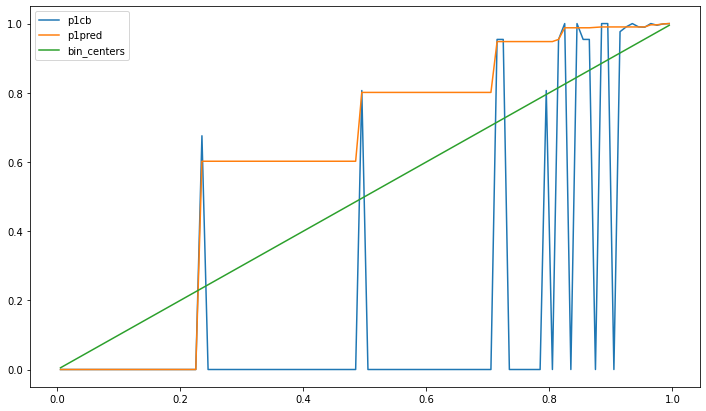

In [26]:
kde._calibrate_classifier(kde.hist_p0_, kde.hist_p1_, kde.bin_edges_, validation_plots=True)

In [27]:
X_gen = kde.sample_no_weights(n_samples=data.shape[0], show_progress=True, mode="cheap")

INFO:KDECopulaNNPdf:Generating 60000 data points.
Generating for node: 166: 100%|██████████| 785/785 [02:37<00:00,  4.99it/s]


In [28]:
p2 = kde.clf_predict_proba(X_gen)[:, 1]

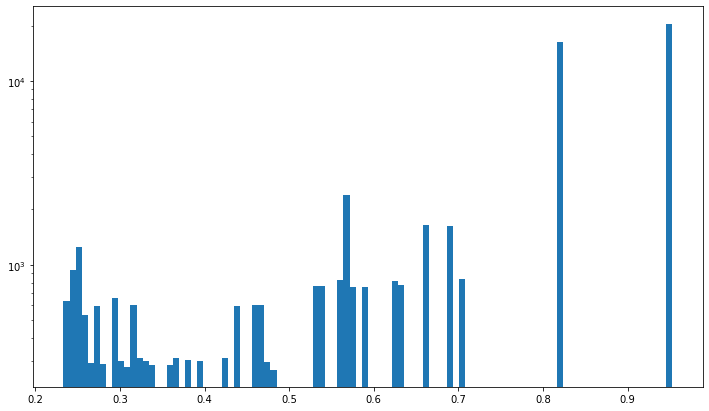

In [29]:
plt.figure(figsize=(12,7))
plt.hist(p2, bins=100, log=True);

In [30]:
df = pd.DataFrame(X_gen)

In [31]:
df.to_csv('mnist28_gen.csv', index=False)

# run sdgym

In [31]:
def KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns):
    all_features = list(range(real_data.shape[1]))
    numerical_features = list(set(all_features) - set(categorical_columns + ordinal_columns))
    data = np.float64(real_data)
    
    n_samples = data.shape[0]
    n_features = data.shape[1]
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        reg_lambda=1,
        gamma=0,
        max_depth=9
    )
#     clf = MLPClassifier(alpha=0.1, random_state=0, max_iter=1000, early_stopping=True)

    def zero_weight(x, y):
        return 0.

    kde = KDECopulaNNPdf(
        use_KDE=False, 
        categorical_columns=categorical_columns+ordinal_columns,
        distinct_threshold=-1,
        n_uniform_bins=30,
        n_calibration_bins=100,
        test_size=0.2,
        edge_weights_fn=zero_weight,
        class_node=144
#        clf=clf,
#         ordering='mi',
    )
    kde = kde.fit(data)
    
#     X_gen, sample_weight = kde.sample(n_samples)
    X_gen = kde.sample_no_weights(n_samples, show_progress=True, mode='cheap')
    
    X_gen[:, categorical_columns+ordinal_columns] = np.round(X_gen[:, categorical_columns+ordinal_columns])
    X_gen = np.float32(X_gen)
    
    return X_gen

In [32]:
def KDECopulaNNPdf_SynthesizerInteger(real_data, categorical_columns, ordinal_columns):
    """Census has integer only..."""
    data = KDECopulaNNPdf_Synthesizer(real_data, categorical_columns, ordinal_columns)
    data = np.round(data)
    
    return data

In [34]:
def KDECopulaNNPdf_csv(real_data, categorical_columns, ordinal_columns):
    """Census has integer only..."""
    df = pd.read_csv('mnist28_gen.csv')
    data = df.values
    data = np.round(data)    
    return data

In [35]:
from sdgym.synthesizers import (
    CLBNSynthesizer, CTGANSynthesizer, IdentitySynthesizer, IndependentSynthesizer,
    MedganSynthesizer, PrivBNSynthesizer, TableganSynthesizer, TVAESynthesizer,
    UniformSynthesizer, VEEGANSynthesizer)

all_synthesizers = [
    #IdentitySynthesizer,
    #IndependentSynthesizer,
    #KDECopulaNNPdf_Synthesizer,
    #KDECopulaNNPdf_SynthesizerInteger,
    KDECopulaNNPdf_csv,
]

In [36]:
scores = sdgym.run(synthesizers=all_synthesizers, datasets=[dataset_name], iterations=1)

INFO:sdgym.benchmark:0%|          | 0/1 [00:00<?, ?it/s]
INFO:sdgym.benchmark:Evaluating KDECopulaNNPdf_csv on dataset mnist28; iteration 0; 839.91 MB
INFO:sdgym.data:Loading dataset mnist28 (all variables)
INFO:sdgym.benchmark:Running KDECopulaNNPdf_csv on dataset mnist28; iteration 0; 887.93 MB
INFO:sdgym.benchmark:Scoring KDECopulaNNPdf_csv on dataset mnist28; iteration 0; 1.37 GB
INFO:sdgym.evaluate:Evaluating using multiclass classifier DecisionTreeClassifier
INFO:sdgym.evaluate:Evaluating using multiclass classifier MLPClassifier
INFO:sdgym.benchmark:Finished KDECopulaNNPdf_csv on dataset mnist28; iteration 0; 1.41 GB
INFO:sdgym.benchmark:100%|##########| 1/1 [08:04<00:00, 484.91s/it]


In [37]:
scores

,mnist28/accuracy,mnist28/macro_f1,mnist28/micro_f1,timestamp
VEEGANSynthesizer,0.155633,0.058183,0.155633,2020-04-12 09:41:35.096775
CLBNSynthesizer,0.163150,0.149586,0.163150,2020-10-17 09:46:54.494331
CTGAN,0.137750,0.118958,0.137750,2020-10-17 09:46:54.494331
CTGANSynthesizer,0.112467,0.103430,0.112467,2020-10-17 09:46:54.494331
CopulaGAN,0.149233,0.130133,0.149233,2020-10-17 09:46:54.494331
GaussianCopulaCategorical,NaN,NaN,NaN,2020-10-17 09:46:54.494331
GaussianCopulaCategoricalFuzzy,0.176017,0.164199,0.176017,2020-10-17 09:46:54.494331
GaussianCopulaOneHot,0.493067,0.457932,0.493067,2020-10-17 09:46:54.494331
IdentitySynthesizer,0.905600,0.904276,0.905600,2020-10-17 09:46:54.494331
IndependentSynthesizer,0.099767,0.098909,0.099767,2020-10-17 09:46:54.494331
